#### Young generations are living in a quick pace life and some of them have to move between cities frequently for jobs or families. In China, when we <br><br>talked about a place to live or travel, the environment is always a key element for people to think about. Also, take consider of China’s situation, air<br><br> quality is always a question because this country is developing really fast.


 Due to this situation, our research is mainly focus on Chinese air quality data, we will use a new way to evaluate the environment condition, contains <br><br>both official government data and social media data. We will do a prediction model based on LSTM and will have a numeric result for all posts on <br><br>social media.

 We decided to use data form government website, but we also want to know how people feel about an area, so we also collect comments <br><br>data from Weibo, after semantic analysis to these comments, we combine these comments’ results with official data, the new result will <br><br>be much more reliable then numbers from government’s posts, which is relatively onefold.

 Due to this situation, our research is mainly focus on Chinese air quality data, we will use a new way to evaluate the environment condition, <br><br>contains both official government data and social media data. We will do a prediction model and will have a numeric result for all posts on social <br><br>media.

#### Bazhuayu Crawler:
It is a crawler tool which has a good access to Sina Weibo, the major data source we have in our research. It helps us collect the posts, comments, usernames, date and time, repost times, thumb up times and so on.


#### dataset:
We obtained Chinese official data of air quality from the website: http://www.mee.gov.cn/.
<img src="images/a1.png" width=300 />
We also have more close daily data from https://www.aqistudy.cn/historydata/, which provides most cities daily weather data from 2014 to now. We collected AQI from 2015 to 2019 on this website. 
<img src="images/a2.png" width=300 />
<br><br>
<img src="images/a3.png" width=300 />

## This is what we are going to do:
<img src="images/flow.png" width=600 />


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import requests
import xlrd
import openpyxl

#### Not very good, isn't it? So we decide to combine the sentimental data together to do the training! 

In [2]:
bj_senti=pd.read_csv("data/beijing_senti.csv")
bj_senti

,Unnamed: 0,time,positive,negative
0,0,2019/5/1,0.939747,0.060253
1,1,2019/5/1,0.052578,0.947422
2,2,2019/5/1,0.946240,0.053760
3,3,2019/5/1,0.946240,0.053760
4,4,2019/5/1,0.035910,0.964090
...,...,...,...,...
4530,1300,2019/4/29,0.956832,0.043168
4531,1301,2019/4/29,0.717991,0.282009
4532,1302,2019/4/29,0.006620,0.993380
4533,1303,2019/4/29,0.993882,0.006118


In [3]:
bj_senti = bj_senti.iloc[:,1:5]
bj_senti

,time,positive,negative
0,2019/5/1,0.939747,0.060253
1,2019/5/1,0.052578,0.947422
2,2019/5/1,0.946240,0.053760
3,2019/5/1,0.946240,0.053760
4,2019/5/1,0.035910,0.964090
...,...,...,...
4530,2019/4/29,0.956832,0.043168
4531,2019/4/29,0.717991,0.282009
4532,2019/4/29,0.006620,0.993380
4533,2019/4/29,0.993882,0.006118


In [4]:
bj_senti['time']

0        2019/5/1
1        2019/5/1
2        2019/5/1
3        2019/5/1
4        2019/5/1
          ...    
4530    2019/4/29
4531    2019/4/29
4532    2019/4/29
4533    2019/4/29
4534    2019/4/29
Name: time, Length: 4535, dtype: object

In [5]:
bj_senti = bj_senti.sort_values(by="time" , ascending=True)

In [6]:
bj_senti["newindex"] = range(len(bj_senti))
bj_senti

,time,positive,negative,newindex
1957,2017/1/10,0.794246,0.205754,0
1956,2017/1/10,0.794246,0.205754,1
1984,2017/1/10,0.632862,0.367138,2
1983,2017/1/10,0.679749,0.320251,3
1982,2017/1/10,0.102446,0.897554,4
...,...,...,...,...
0,2019/5/1,0.939747,0.060253,4530
3183,26分钟前,0.782039,0.217961,4531
3184,56分钟前,0.805995,0.194005,4532
2192,今天06:26,0.555918,0.444082,4533


In [7]:
bj_senti = bj_senti.set_index('newindex')
bj_senti

,time,positive,negative
newindex,,,
0,2017/1/10,0.794246,0.205754
1,2017/1/10,0.794246,0.205754
2,2017/1/10,0.632862,0.367138
3,2017/1/10,0.679749,0.320251
4,2017/1/10,0.102446,0.897554
...,...,...,...
4530,2019/5/1,0.939747,0.060253
4531,26分钟前,0.782039,0.217961
4532,56分钟前,0.805995,0.194005


In [8]:
bj_senti = bj_senti[:4531]
bj_senti

,time,positive,negative
newindex,,,
0,2017/1/10,0.794246,0.205754
1,2017/1/10,0.794246,0.205754
2,2017/1/10,0.632862,0.367138
3,2017/1/10,0.679749,0.320251
4,2017/1/10,0.102446,0.897554
...,...,...,...
4526,2019/5/1,0.094458,0.905542
4527,2019/5/1,0.997467,0.002533
4528,2019/5/1,0.912030,0.087970


### sort by date

In [9]:
bj_senti['time']=pd.to_datetime(bj_senti['time'])
bj_senti.index = bj_senti['time']
del bj_senti['time']
bj_senti.sort_index(inplace = True)
print(bj_senti.tail(50))

            positive  negative
time                          
2019-05-01  0.965104  0.034896
2019-05-01  0.623198  0.376802
2019-05-01  0.993502  0.006498
2019-05-01  0.906583  0.093417
2019-05-01  0.977509  0.022491
2019-05-01  0.919290  0.080710
2019-05-01  0.974794  0.025206
2019-05-01  0.690842  0.309158
2019-05-01  0.598201  0.401799
2019-05-01  0.888273  0.111727
2019-05-01  0.962364  0.037636
2019-05-01  0.967346  0.032654
2019-05-01  0.470217  0.529783
2019-05-01  0.939037  0.060963
2019-05-01  0.662472  0.337528
2019-05-01  0.953774  0.046226
2019-05-01  0.073474  0.926526
2019-05-01  0.955840  0.044160
2019-05-01  0.974794  0.025206
2019-05-01  0.987068  0.012932
2019-05-01  0.987068  0.012932
2019-05-01  0.912030  0.087970
2019-05-01  0.903657  0.096343
2019-05-01  0.993184  0.006816
2019-05-01  0.646462  0.353538
2019-05-01  0.606455  0.393545
2019-05-01  0.931431  0.068569
2019-05-01  0.928985  0.071015
2019-05-01  0.948352  0.051648
2019-05-01  0.193448  0.806552
2019-05-

/Users/young/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/young/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
bj_senti[3600:]

,positive,negative
time,,
2019-04-29,0.986651,0.013349
2019-04-29,0.869485,0.130515
2019-04-30,0.751971,0.248029
2019-04-30,0.956447,0.043553
2019-04-30,0.986352,0.013648
...,...,...
2019-05-01,0.946240,0.053760
2019-05-01,0.946240,0.053760
2019-05-01,0.052578,0.947422


In [11]:
bj_senti_mean = bj_senti.mean()
bj_senti_mean

positive    0.626735
negative    0.373265
dtype: float64

In [12]:
bj_senti_var = bj_senti.var()
bj_senti_var

positive    0.101537
negative    0.101537
dtype: float64

In [13]:
bj_senti.positive

time
2017-01-06    0.919808
2017-01-06    0.126238
2017-01-06    0.498851
2017-01-06    0.414031
2017-01-06    0.066827
                ...   
2019-05-01    0.946240
2019-05-01    0.946240
2019-05-01    0.052578
2019-05-01    0.806269
2019-05-01    0.939747
Name: positive, Length: 4531, dtype: float64

### group bj_senti by date and calculate each day's mean

In [14]:
mean = bj_senti.groupby('time')['positive'].mean()
mean


time
2017-01-06    0.405774
2017-01-07    0.456404
2017-01-08    0.500032
2017-01-09    0.694033
2017-01-10    0.603548
                ...   
2019-04-27    0.733468
2019-04-28    0.636565
2019-04-29    0.616253
2019-04-30    0.725834
2019-05-01    0.789347
Name: positive, Length: 307, dtype: float64

### EDA

/Users/young/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


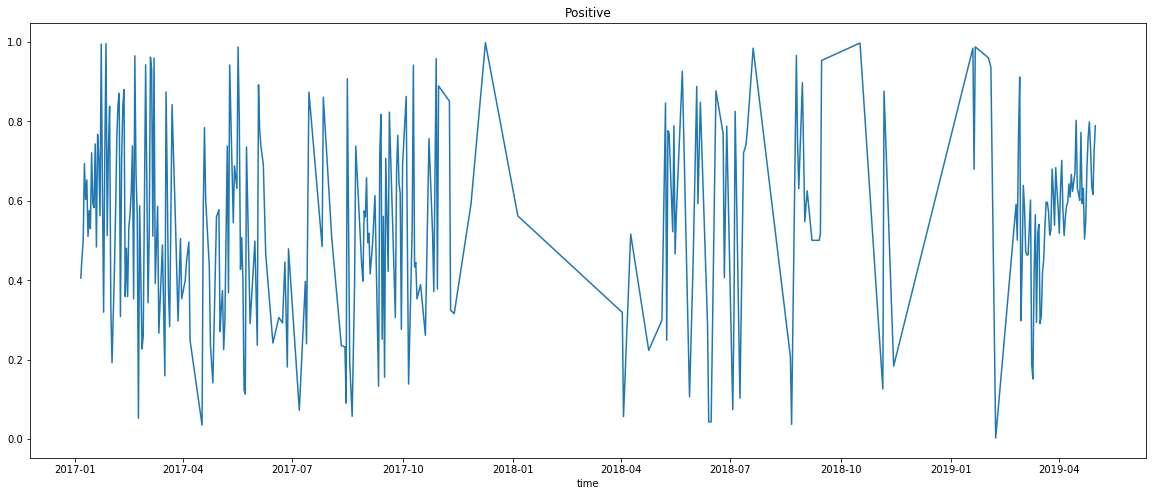

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot(mean)
plt.title('Positive')
# plt.ylabel('')
plt.xlabel('time')
plt.grid(False)
plt.show()

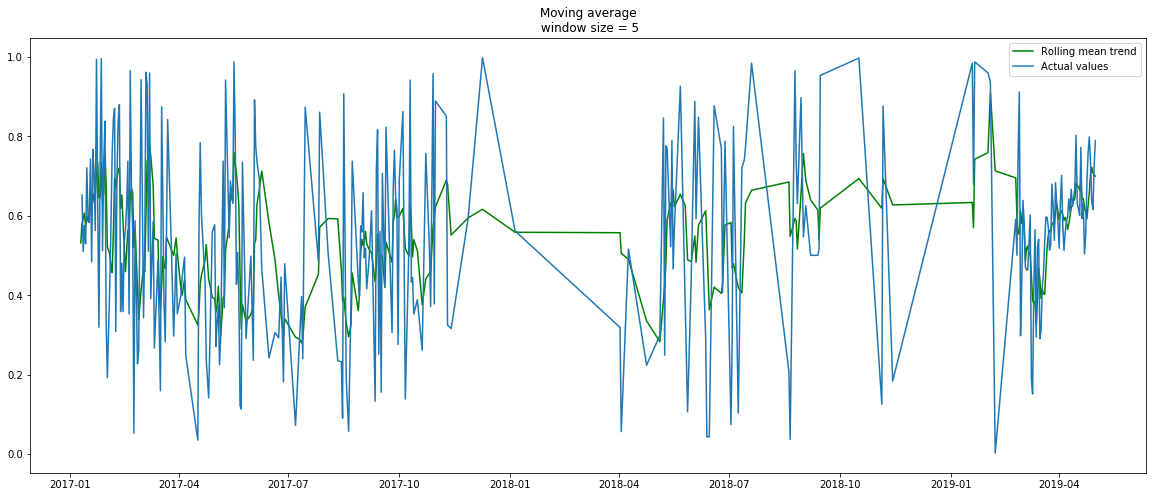

In [16]:
def plot_moving_average(series,window,plot_intervals=False, scale =1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(20,8))
    plt.title('Moving average\n window size = {}'.format(window))
    #smaller window, more details; more bigger window, you can see the plot
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    #plt.plot(lwd = 1)

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(False)

#Smooth by the previous 5 days (by week)
plot_moving_average(mean, 5)

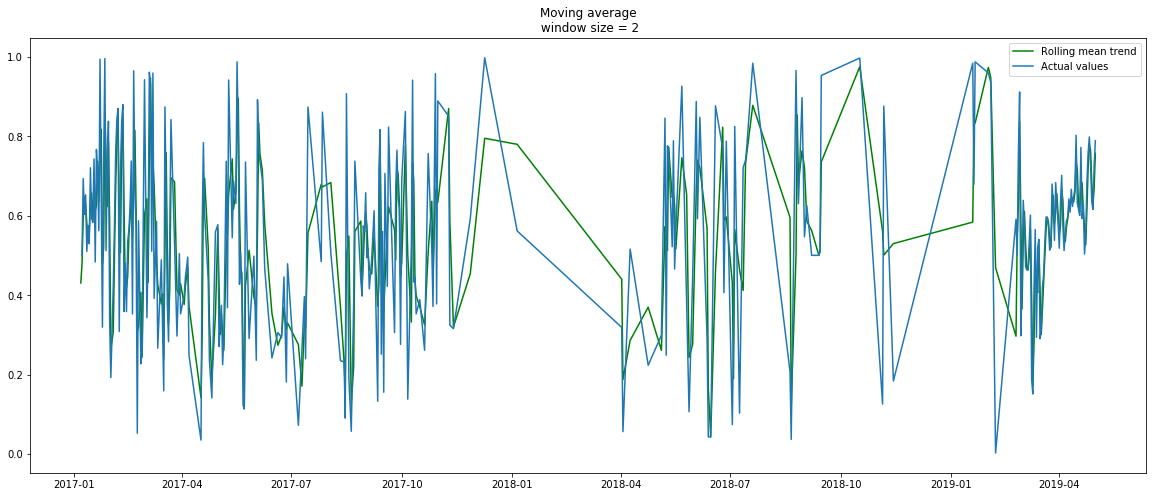

In [17]:
plot_moving_average(mean, 2)

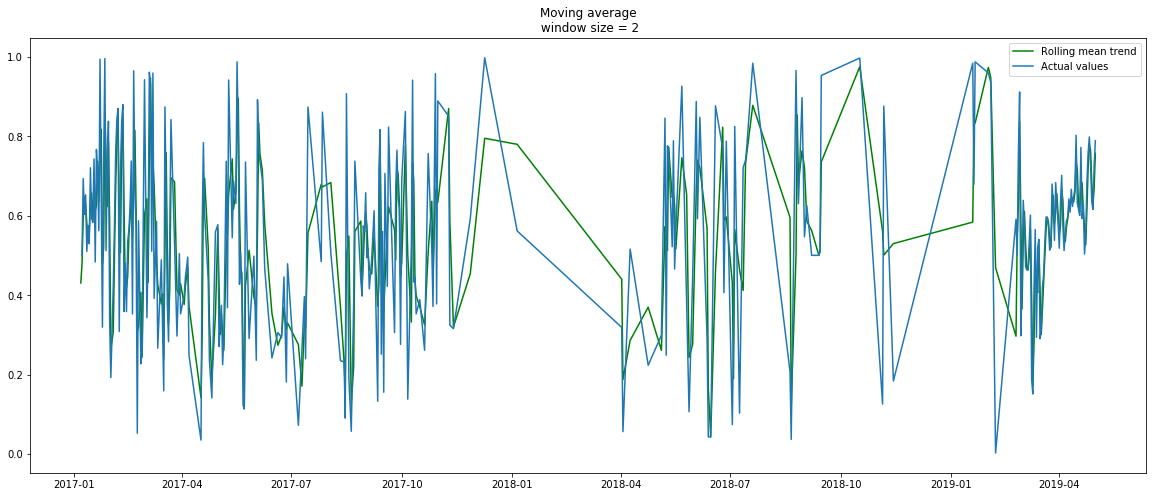

In [18]:
plot_moving_average(mean, 2, plot_intervals=False)

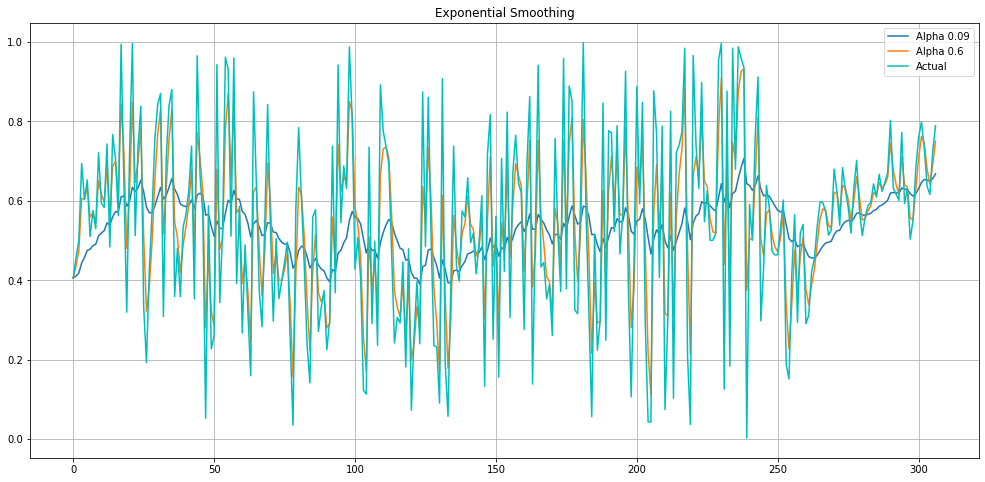

In [19]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(mean, [0.09, 0.6])

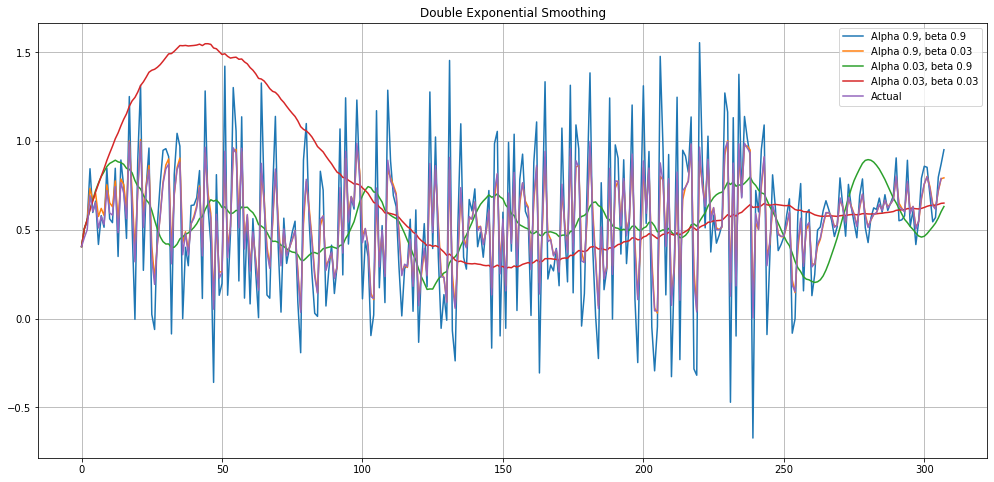

In [20]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(mean, alphas=[0.9, 0.03], betas=[0.9, 0.03])

### LSTM training

The following picture illustrates the process model of our experiments. By reorganize the input format and keep training and evaluation, we can keep improving our model until it can get a good performance.


<img src="images/lstm.png" width=600 />

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [22]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(24, 8))
    plt.plot(test, color='red',label='Real Positive Value')
    plt.plot(predicted, color='blue',label='Predicted Positive Value')
    plt.title('Positive Value Prediction')
    plt.xlabel('Time')
    plt.ylabel('Positive Value')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))


In [23]:
# First, we get the data
# dataset = bj_senti.drop(columns = ['time'])
dataset = bj_senti
dataset

,positive,negative
time,,
2017-01-06,0.919808,0.080192
2017-01-06,0.126238,0.873762
2017-01-06,0.498851,0.501149
2017-01-06,0.414031,0.585969
2017-01-06,0.066827,0.933173
...,...,...
2019-05-01,0.946240,0.053760
2019-05-01,0.946240,0.053760
2019-05-01,0.052578,0.947422


In [58]:
# Checking for missing values
training_set = dataset[:3600].iloc[:,:-1].values
test_set = dataset[3600:].iloc[:,:-1].values
training_set[2:62,0]

array([0.49885148, 0.41403057, 0.06682665, 0.13030599, 0.0622145 ,
       0.59233084, 0.10933038, 0.76914869, 0.04600174, 0.79424647,
       0.76914869, 0.33605199, 0.11756103, 0.4037847 , 0.47722909,
       0.76914869, 0.16130589, 0.93171486, 0.10224849, 0.10224849,
       0.59112481, 0.80965122, 0.10224849, 0.89876979, 0.0622145 ,
       0.03081662, 0.57284403, 0.18040529, 0.24003679, 0.90761643,
       0.0633395 , 0.83677148, 0.81550241, 0.10224849, 0.18040529,
       0.61843603, 0.76914869, 0.76914869, 0.1321754 , 0.54091807,
       0.4077039 , 0.76914869, 0.8039278 , 0.73565099, 0.65856293,
       0.04172772, 0.75160907, 0.10661054, 0.20608964, 0.01400448,
       0.81767386, 0.08764097, 0.58020199, 0.77985176, 0.92088315,
       0.18040529, 0.94128107, 0.74132056, 0.10870891, 0.17485922])

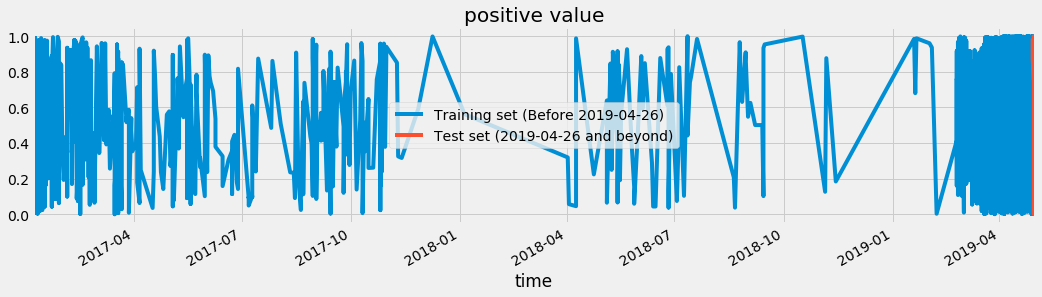

In [59]:
dataset["positive"][:3600].plot(figsize=(16,4),legend=True)
dataset["positive"][3600:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2019-04-26)','Test set (2019-04-26 and beyond)'])
plt.title('positive value')
plt.show()

In [60]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,3600):
    X_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(3540, 60)

In [61]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(3540, 60, 1)

In [62]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
3540/3540 [==============================] - 10s 3ms/step - loss: 0.1212
Epoch 2/50
3540/3540 [==============================] - 10s 3ms/step - loss: 0.1082
Epoch 3/50
3540/3540 [==============================] - 11s 3ms/step - loss: 0.1054
Epoch 4/50
3540/3540 [==============================] - 8s 2ms/step - loss: 0.1049
Epoch 5/50
3540/3540 [==============================] - 8s 2ms/step - loss: 0.1052
Epoch 6/50
3540/3540 [==============================] - 8s 2ms/step - loss: 0.1029
Epoch 7/50
3540/3540 [==============================] - 9s 3ms/step - loss: 0.1029
Epoch 8/50
3540/3540 [==============================] - 9s 3ms/step - loss: 0.1026
Epoch 9/50
3540/3540 [==============================] - 9s 3ms/step - loss: 0.1031
Epoch 10/50
3540/3540 [==============================] - 9s 2ms/step - loss: 0.1026
Epoch 11/50
3540/3540 [==============================] - 9s 2ms/step - loss: 0.1026
Epoch 12/50
3540/3540 [==============================] - 9s 2ms/step - loss: 0.102

In [63]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = sc.fit_transform(training_set)
training_set

array([[0.9198748 ],
       [0.12621515],
       [0.49887077],
       ...,
       [0.98876151],
       [0.99328119],
       [0.98993347]])

In [64]:
# Now to get the test set ready in a similar way as the training set.
dataset_total = pd.concat((dataset["positive"][:3600],dataset["positive"][3600:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
inputs

array([[5.31504574e-01],
       [9.74458837e-01],
       [4.00651470e-01],
       [9.87291075e-01],
       [4.47373042e-01],
       [5.25005110e-01],
       [8.01933055e-01],
       [2.23252619e-01],
       [1.83247559e-01],
       [8.54883696e-01],
       [6.17517993e-03],
       [4.42817463e-01],
       [9.21093351e-01],
       [1.61495178e-01],
       [9.08382816e-01],
       [9.50988858e-01],
       [2.53712407e-01],
       [1.38397617e-01],
       [9.89933472e-01],
       [5.23074084e-01],
       [9.34817030e-01],
       [3.04808194e-02],
       [9.54847118e-01],
       [9.57041927e-01],
       [9.17679433e-01],
       [8.39599202e-01],
       [6.20074735e-01],
       [9.85411574e-01],
       [5.78606552e-02],
       [9.30783387e-01],
       [5.54758631e-01],
       [7.31786791e-01],
       [8.71301027e-01],
       [6.86792571e-01],
       [3.11125694e-01],
       [3.34480581e-01],
       [8.39205959e-01],
       [9.78590766e-01],
       [9.92425618e-01],
       [9.79134703e-01],


In [65]:
inputs[1:1,0]

array([], dtype=float64)

In [66]:
test_set.shape

(931, 1)

In [67]:
# Preparing X_test and predicting the value
X_test = []
for i in range(60,991):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_positive_value = regressor.predict(X_test)
predicted_positive_value = sc.inverse_transform(predicted_positive_value)

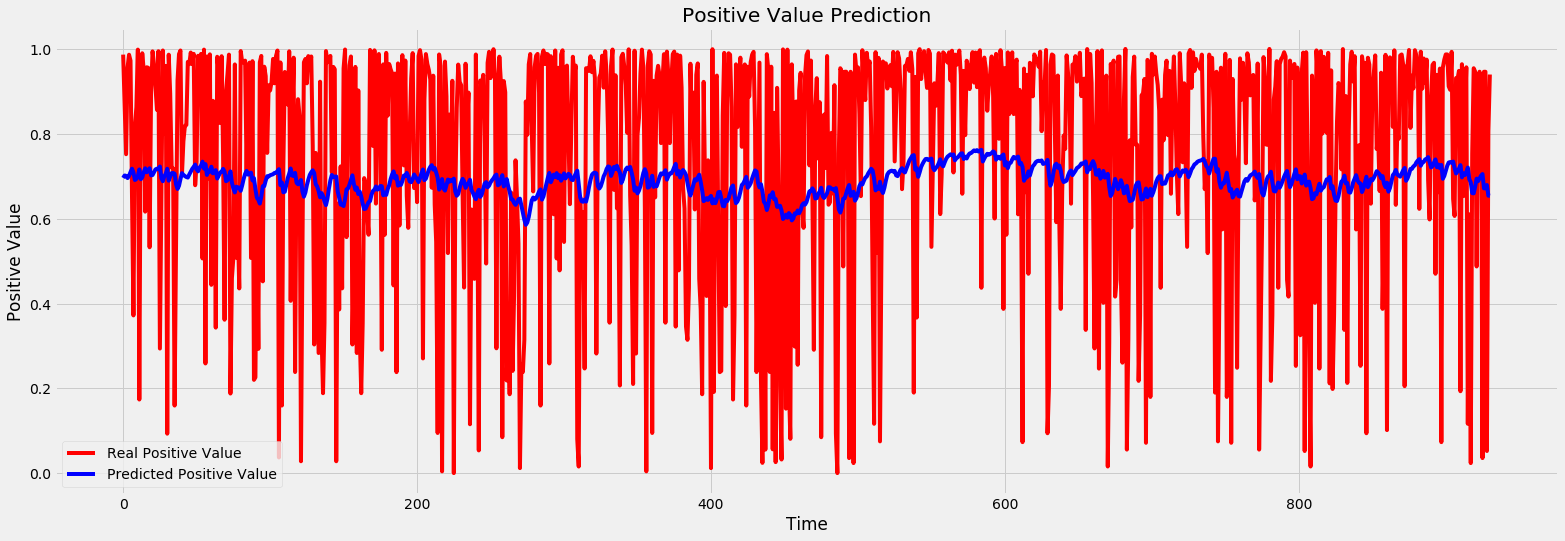

In [68]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_positive_value)

# Use trained model to predict AQI

In [69]:
# get data
bj_AQI=pd.read_csv("data/BeiJing_AQI.csv")
bj_AQI = bj_AQI.iloc[:,:2]
bj_AQI_data = bj_AQI.iloc[:,1:]
bj_AQI_data

,AQI
0,102
1,185
2,153
3,36
4,39
...,...
1575,48
1576,80
1577,144
1578,61


In [70]:
test_set = bj_AQI_data[1200:].values
test_set.shape

(380, 1)

In [71]:
#sc = MinMaxScaler(feature_range=(0,1))
test_set = sc.fit_transform(test_set)
test_set.shape

(380, 1)

In [72]:
test_set

array([[0.21851852],
       [0.34814815],
       [0.40740741],
       [0.22592593],
       [0.30740741],
       [0.37777778],
       [0.51481481],
       [0.55925926],
       [0.6       ],
       [0.        ],
       [0.32962963],
       [0.        ],
       [0.23333333],
       [0.35185185],
       [0.57037037],
       [0.47777778],
       [0.74074074],
       [0.32222222],
       [0.38518519],
       [0.60740741],
       [0.63703704],
       [0.35185185],
       [0.33333333],
       [0.2037037 ],
       [0.39259259],
       [0.37037037],
       [0.5       ],
       [0.23703704],
       [0.46296296],
       [0.5037037 ],
       [0.52222222],
       [0.36296296],
       [0.54814815],
       [0.43703704],
       [0.35925926],
       [0.58148148],
       [0.37037037],
       [0.75185185],
       [0.68518519],
       [0.46666667],
       [0.6037037 ],
       [0.17777778],
       [0.24444444],
       [0.38148148],
       [0.68888889],
       [0.44444444],
       [0.40740741],
       [0.451

In [73]:
# Preparing X_test and predicting the value
# Now to get the test set ready in a similar way as the training set.
# The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# for train_set use fit_transform, test_set use transform
dataset_total = bj_AQI_data
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
inputs

X_test = []
for i in range(60,440):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_positive_value = regressor.predict(X_test)
#predicted_positive_value = sc.inverse_transform(predicted_positive_value)


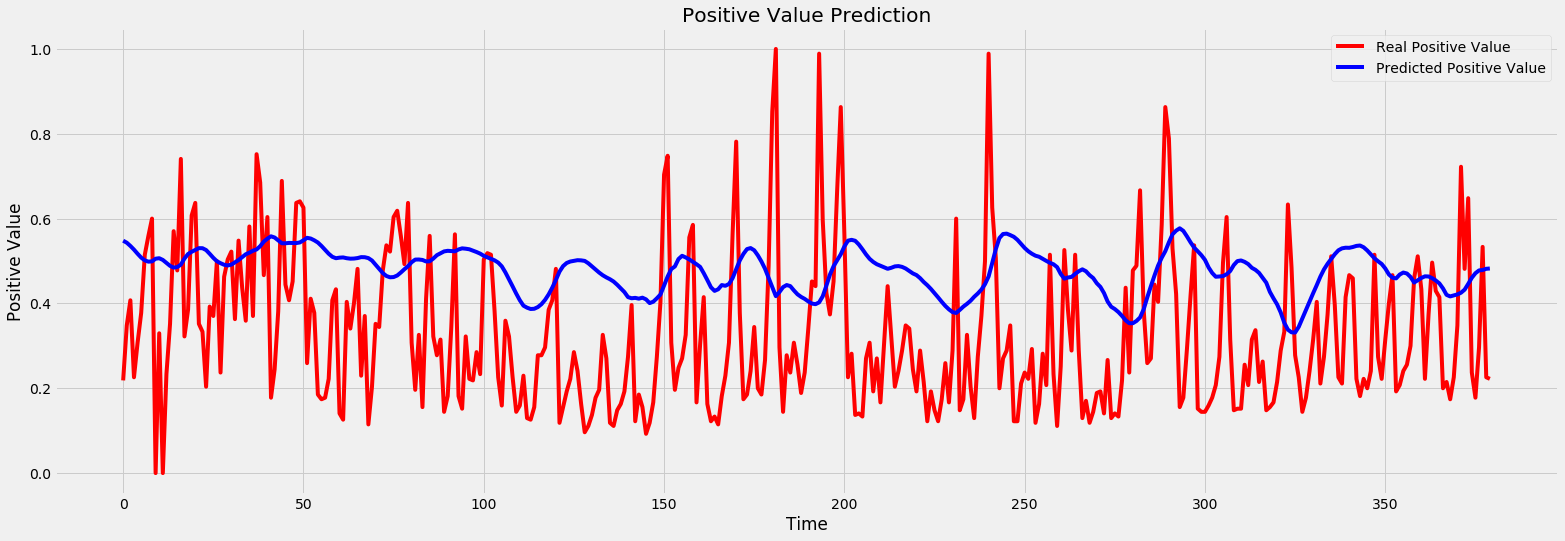

In [74]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_positive_value)

In [75]:
# Evaluating our model 
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
return_rmse(test_set,predicted_positive_value)

The root mean squared error is 0.23290651200960727.


## Compare to the training model used AQI dataset itself

<img src="images/AQI.png" width=1200 height=600 />

#### We first trained the model with different key words seperately, and we get some results:
<tr>
    <td><img src="images/p1.png" width=300 /><br><br></td>
    <td><img src="images/p2.png" width=300 /><br><br></td>
    <td><img src="images/p3.png" width=300 /><br><br></td>
    <td><img src="images/p4.png" width=300 /><br><br></td>
    <td><img src="images/p5.png" width=300 /><br><br></td>
    <td><img src="images/p6.png" width=300 /><br><br></td>
</tr>

## Conclusion: 
There is a relationship between sentiment and air quality. We achived an ...okay result.

It's hard to predict air quality only by sentiment but the trendency do match with AQI.


## Improvement: 

keywords itself has emotional leaning. For example, when people posting the word weather they are likely saying good weather. When it comes to PM2.5, it's usually bad. 

Also, it can perform better if we have a bigger dataset. 

### Reference
https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series